In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Data Collection and preprocessing


In [ ]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
correlation = gold_data.corr()


<ipython-input-8-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

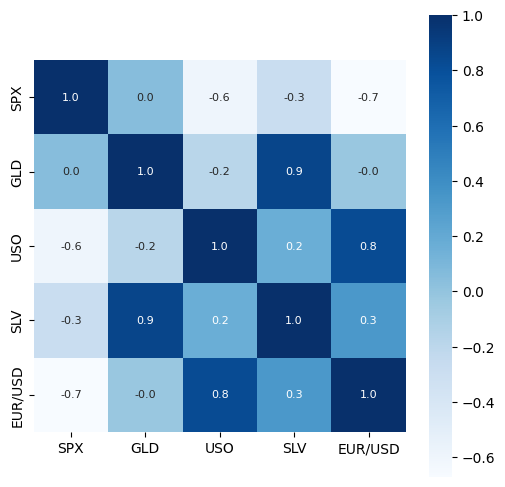

In [ ]:
#constructiong a heatmap to understand correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation, annot=True, square=True, cmap='Blues', fmt=".1f", annot_kws={'size': 8}, cbar=True)

In [ ]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-16-fdfce5c0f5fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='red')


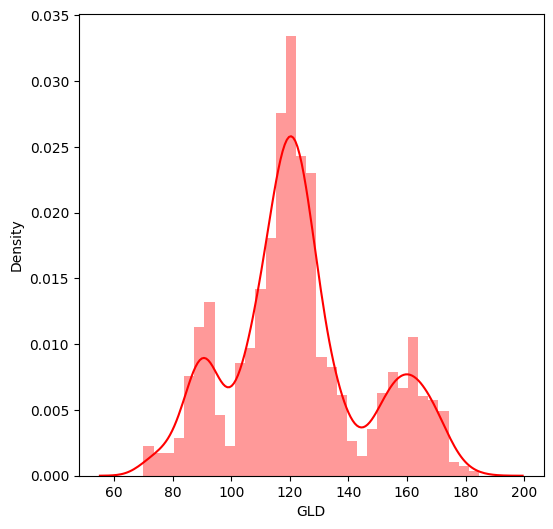

In [ ]:
#plotting a distplot for GLD
plt.figure(figsize=(6,6))
sns.distplot(gold_data['GLD'], color='red')
plt.show()

In [ ]:
#splitting
X = gold_data.drop(columns = ["Date", "GLD"], axis = 1)
Y = gold_data["GLD"]


In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2290,) (1832,) (458,)


<!-- Model Training -->

#Model Training

In [ ]:
model = RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
#pred on trianing data
train_data_pred = model.predict(X_train)
print(train_data_pred)

[115.38730075 121.33869833 153.27919676 ... 104.80410022 108.59959782
 127.87509939]


In [ ]:
#r squared error
r2_score = metrics.r2_score(Y_train, train_data_pred)
print("Training data  prediction accuracy:", r2_score)

Training data  prediction accuracy: 0.9986239588074475


In [ ]:
#pred on testing data
test_data_pred = model.predict(X_test)
print(test_data_pred)

[163.11539882 127.60979854 124.24509935 119.56789924 125.89539855
  86.12119801 171.67880167 137.34549983 106.9795004  133.31870157
 120.64429912 124.71560057 143.22369878 104.58650017  80.80209908
 120.12150008 140.33770013  90.48570056  91.44029959 128.27820207
 125.95579977 147.73439973 116.54740149 152.5939996  129.56419915
 129.61870125 118.30870116 111.38150067 168.26760166 158.24829831
 125.9589016  153.69420165 127.05499949 122.66679795 116.11970174
 154.51100008 115.0632004  120.52900115 103.86860197 105.26050043
 134.9207987   85.93289978 154.45130142 121.46819998 122.35750092
 155.4440004  120.5305998  116.68329965 168.8431019  116.56620064
 137.639402   162.00839871 158.57660055 152.99560131 124.04750016
 117.02440004 167.06760109 117.18209965 165.5967996   84.38069957
 121.33609906 122.24160025 119.96420046 171.96779919 118.70859978
 180.78589654 162.10330367 138.01270274 115.87200005  92.60410058
 171.89120033 117.51549982 117.71319868 125.51899989 146.86789948
  91.04690

In [ ]:
#r squared error
r2_score = metrics.r2_score(Y_test, test_data_pred)
print("testing data  prediction accuracy:", r2_score)

testing data  prediction accuracy: 0.9851841336942848


In [ ]:
#comparing the actual and predicted values in a list
Y_test = list(Y_test)

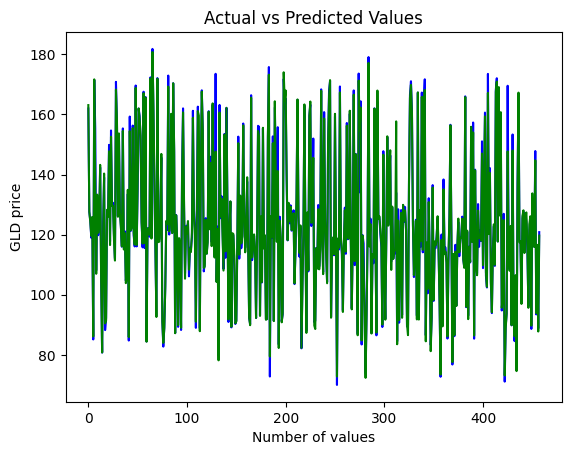

In [ ]:
plt.plot(Y_test, color="blue", label="Actual Values")
plt.plot(test_data_pred, color="green", label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.show()